In [23]:
import tensorflow as tf
import tensorflow_datasets as tfds
import os

data, meta = tfds.load(name='mnist', as_supervised=True, with_info=True)

# to avoid warnings of authentication attempts
os.environ['GOOGLE_APPLICATION_CREDENTIALS'] = ''


In [24]:
training_data = data['train']
testing_data = data['test']

class_names = meta.features['label'].names

In [25]:
#normalize the data
#0-255 -> 0-1
# tranform to 0-255 0-1 (0=0, 255=1, 127=0.5)
def normalizer_fn(image, label):
    image = tf.cast(image, tf.float32) / 255 # cast to float32 and divide by 255
    return image, label

training_data = training_data.map(normalizer_fn)
testing_data = testing_data.map(normalizer_fn)

# add to cache
training_data = training_data.cache()
testing_data = testing_data.cache()

2024-11-25 13:37:35.039251: W tensorflow/core/kernels/data/cache_dataset_ops.cc:914] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2024-11-25 13:37:35.039343: W tensorflow/core/kernels/data/cache_dataset_ops.cc:914] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


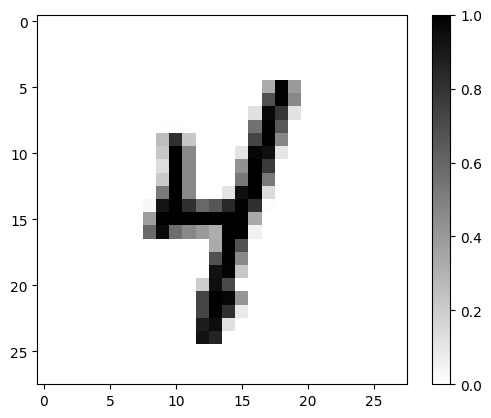

In [26]:
for  image, label in training_data.take(1):
    break

import matplotlib.pyplot as plt

plt.figure()
plt.imshow(image, cmap=plt.cm.binary)
plt.colorbar()


2024-11-25 13:37:35.680426: W tensorflow/core/kernels/data/cache_dataset_ops.cc:914] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2024-11-25 13:37:35.680490: W tensorflow/core/kernels/data/cache_dataset_ops.cc:914] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.


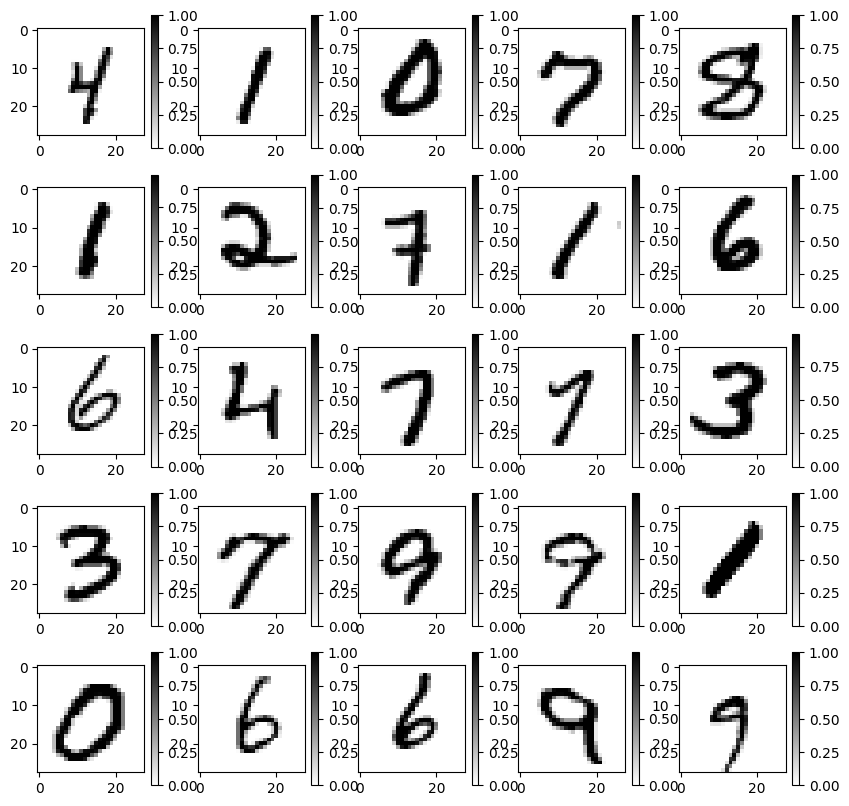

In [27]:
plt.figure(figsize=(10,10))
for  i, (image, label) in enumerate(training_data.take(25)):
    plt.subplot(5,5, i+1)
    plt.imshow(image, cmap=plt.cm.binary)
    plt.colorbar()


plt.show()



In [28]:

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)), # 1 = grayscale
    #  hidden layer
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    tf.keras.layers.Dense(50, activation=tf.nn.relu),
    # output layer
    tf.keras.layers.Dense(10, activation=tf.nn.softmax),
])

/Users/diegochavez/.pyenv/versions/3.10.13/lib/python3.10/site-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [29]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(0.001),
    loss=tf.losses.SparseCategoricalCrossentropy(),
    # https://www.tensorflow.org/api_docs/python/tf/losses/SparseCategoricalCrossentropy
    metrics=['accuracy'] # to show the accuracy of the model
)

In [30]:
BATCHING_STEPS = 32

training_data = training_data.shuffle(1000).batch(BATCHING_STEPS).repeat()
testing_data = testing_data.batch(BATCHING_STEPS)

In [32]:
import math

# training 

training = model.fit(
    training_data,
    epochs=10,
    steps_per_epoch=math.ceil(60000/BATCHING_STEPS)
)

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 545us/step - accuracy: 0.9797 - loss: 0.0636
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 534us/step - accuracy: 0.9836 - loss: 0.0524
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 566us/step - accuracy: 0.9853 - loss: 0.0466
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 535us/step - accuracy: 0.9873 - loss: 0.0390
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 553us/step - accuracy: 0.9885 - loss: 0.0358
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 561us/step - accuracy: 0.9908 - loss: 0.0286
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 531us/step - accuracy: 0.9911 - loss: 0.0279
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 545us/step - accuracy: 0.9926 - loss: 0.0229
Epoch 9/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 551us/step - accuracy: 0.9920 - loss: 0.0239
Epoch 10/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 1s 551us/step - accuracy: 0.9929 - loss: 0.0225


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step


2024-11-25 13:43:45.753174: W tensorflow/core/kernels/data/cache_dataset_ops.cc:914] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2024-11-25 13:43:45.753556: W tensorflow/core/kernels/data/cache_dataset_ops.cc:914] The calling iterator did not fully read the dataset being cached. In order to avoid unexpected truncation of the dataset, the partially cached contents of the dataset  will be discarded. This can happen if you have an input pipeline similar to `dataset.cache().take(k).repeat()`. You should use `dataset.take(k).cache().repeat()` instead.
2024-11-25 13:43:45.794708: I tensorflow/core/framework/local_rendezvous.cc:405] Local rendezvous is aborting with status: OUT_OF_RANGE: End of sequence

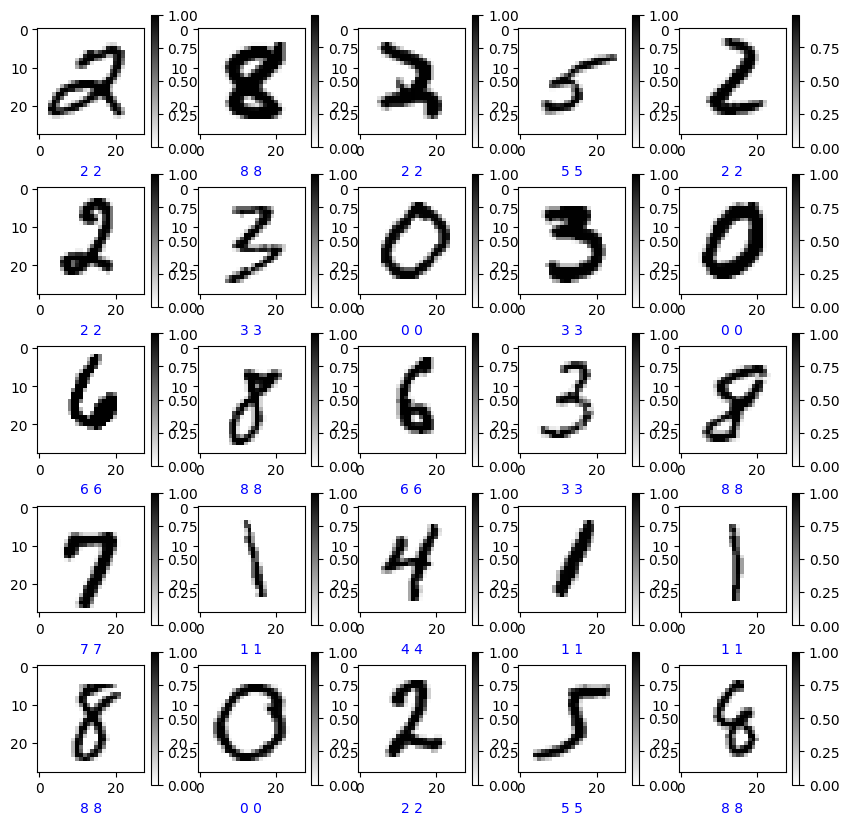

In [33]:
# Create a grid with multiple predictions, mark the correct predictions with blue and the incorrect ones with red

plt.figure(figsize=(10,10))
for  i, (image, label) in enumerate(testing_data.take(25)):
    plt.subplot(5,5, i+1)
    plt.imshow(image[0], cmap=plt.cm.binary)
    plt.colorbar()
    prediction = model.predict(image)
    predicted_label = class_names[tf.argmax(prediction[0])]
    true_label = class_names[label[0]]
    if predicted_label == true_label:
        color = 'blue'
    else:
        color = 'red'
    plt.xlabel(f'{predicted_label} {true_label}', color=color)
    